In [2]:
from sklearn.pipeline import Pipeline, make_pipeline

## 알고리즘을 분류기 1개만 사용한  케이스

In [3]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 1. 데이터 수집
# 2. 데이어 가공, 전처리
# 3. 알고리즘 선정, 생성, 학습
# 4. 예측 및 평가

In [12]:
#1. 데이터 수집 
breast_cancer_data = load_breast_cancer()

In [15]:
# 2. 데이어 가공, 전처리
import pandas as pd

In [49]:
data_train, data_test, label_train, label_test = train_test_split(breast_cancer_data['data'],breast_cancer_data['target'],
                                                                 random_state = 0)

In [50]:
# 3. 알고리즘 선정, 생성, 학습
clf = SVC(gamma='auto')
clf.fit(data_train, label_train) # train을 통째로 집어 넣는건데 label이 뭔지 구분해준거일 뿐임.

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [51]:
# 4.예측 및 평가
from sklearn import metrics 

In [52]:
pre = clf.predict(data_test) #data_test에 대한 label을 예측하는 것임. 애초에 목적이 label을 예측하는 것임.
clf.score(data_test,label_test)

0.6293706293706294

In [ ]:
#### 전처리 스케일링 작업 1개 추가 + 분류기 1개 이어서 사용

In [60]:
##### 데이터를 scaling을 하여 성능 측정
from sklearn.preprocessing import MinMaxScaler

breast_cancer_data = load_breast_cancer()
# ======================================================
# 데이터 가공 및 전처리
data_train, data_test, label_train, label_test = train_test_split(breast_cancer_data['data'],breast_cancer_data['target'],
                                                                 random_state = 0)
# 스케일러 생성
scaler = MinMaxScaler().fit(data_train)
# 훈련 데이터 스케일링 
data_train_scaled = scaler.transform(data_train)
data_train_scaled
# =======================================================
#무슨 근거로 정규화를 하는가 ??
clf = SVC(gamma='auto')
clf.fit(data_train_scaled, label_train) 
clf.score(scaler.transform(data_test),label_test)

# 결론
# 데이터 전처리만으로 정확도가 32% 증가하였다.
# 즉 알고리즘 자체 성능 뿐만 아니라, 매개변수, 전처리 과정, 특성화 처리 등 전과정이 동시다발적으로 순차 처리 되야 최적의 모델을 설계할 수 있다.

0.951048951048951

## 파이프라인 구축
- 위에 모델을 파이프라인으로 재구성

In [62]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([ ('scaler',MinMaxScaler()),
                     ('svm', SVC(gamma='auto')) ])

In [64]:
# 학습
pipeline.fit(data_train,label_train)
#점수
pipeline.score(data_test,label_test)
# 이전 점수 : 0.9510489
# 현재 점수 : 0.9510489

0.951048951048951

### 레이블 정리

|개수|타입|내용|
|:--:|:--:|:--:|
|단일열|이진|분류. 하나의 레이블에 카테고리가 2개다. 반드시 둘중하나 <br> 0 or 1<br>예: 암진단(암이다/아니다), 텍스트를 보고 남자이다/ 여자이다.)|
|단일열|실수|회귀. 단 하나의 값으로 예측하면 된다.<br> 예: 텍스트를 보고 나이판단, 키 판단|
|여러열|이진|분류. 여러 카테고리 존재 <br>예: 월요일 아침이 되면 epl 뉴스를 보고, 댓글을 보고 작성자가 어느팀을 좋아하는지 맞춘다.|
|여러열|실수|회귀. 여러개를 예측한다.<br> 예: 건강검진을 수행- 여러 검사 결과가 있다.여러가지 질병에 걸릴 확률을 예측, 여러열 = 질병수|
|다중열||분류. 각 데이터 샘플이 여러개의 카테고리에 속할 수 있다.<br> 예: 음악을 듣는다. 어떤 악기들이 사용되어 만들어졌는가? 열의 개수 = 악기|

일관성이 없는건가 내가 이해를 못하는건가?


###  모형(모델)최적화

- 데이터 전처리와 매개변수 선택
- 절차상 머신러닝 모델(모형)이 완성이 되고 나서 최적화 진행 => 예측성능 높임
- scikit-learn의 hyperparameter tuning tool이 3개
> validation_curve : 단일 하이퍼 파라미터 최적  
> GridSearchCV : 그리드를 이용한 복수 하이퍼 파라미터 최적화  
> ParameterGrid : 복수 하이퍼 파라미터 최적화.?? grid vs parameter  

In [136]:
from sklearn.model_selection import GridSearchCV

In [137]:
# 1. 매개변수 세팅
params = {
    'C': [0.0001,0.001,0.01,0.1,1.0,10.0, 100.0, 1000.0],
    'gamma': [0.0001,0.001,0.01,0.1,1.0,10.0, 100.0, 1000.0]    
}

In [138]:
grid = GridSearchCV(SVC(),param_grid=params, cv=5)  # svc가 gamma c

In [139]:
grid.fit(data_train_scaled,label_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [144]:
grid.cv_results_

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessi

{'mean_fit_time': array([0.00900617, 0.02591615, 0.00625005, 0.01875029, 0.00937505,
        0.00937529, 0.02500014, 0.03125091, 0.01875014, 0.01875057,
        0.02000775, 0.02641921, 0.02581668, 0.0176125 , 0.03542376,
        0.04463058, 0.02841911, 0.01621075, 0.02821889, 0.02741909,
        0.0196136 , 0.03122153, 0.02241554, 0.05123577, 0.01721258,
        0.02321558, 0.02441535, 0.02121577, 0.02501621, 0.02801919,
        0.02594113, 0.04035058, 0.01541028, 0.01560998, 0.0354248 ,
        0.02761884, 0.02001386, 0.02882037, 0.01761312, 0.04683251,
        0.02661843, 0.02681861, 0.04042797, 0.03342199, 0.02241559,
        0.02241473, 0.0424294 , 0.05563827, 0.0275106 , 0.03437333,
        0.04374986, 0.01562562, 0.08437638, 0.04062519, 0.03125057,
        0.07839165, 0.04523101, 0.07064967, 0.06804614, 0.13849845,
        0.20354447, 0.01741252, 0.04943376, 0.04323087]),
 'std_fit_time': array([1.13443158e-06, 2.53018912e-02, 7.65471385e-03, 2.29643167e-02,
        1.24999642e-0

In [69]:
'최상의 교차 검증 정확도 %.2f'% grid.best_score_ # mean of cross_validation  of best estimator

'최상의 교차 검증 정확도 0.98'

In [71]:
'테스트 점수 %.2f' % grid.score(scaler.transform(data_test), label_test)

'테스트 점수 0.97'

In [72]:
'최적의 매개변수 :%s '% grid.best_params_

"최적의 매개변수 :{'C': 1.0, 'gamma': 1.0} "

<td><img src = './data/매개변수.PNG'>

## 오른쪽 형태를 지향해야함.
<tr>
    <td><img src='./data/cro.PNG'></td>
    <td><img src='./data/cro2.PNG'> </td>
</tr>

In [73]:
# 그림이랑 아래랑 딱히 일치하지 않는다고 생각
# 위 그림은 validation set 까지 scaling 되는걸 방지 한다는 의미로 쓴 거라고 생각.

### 파이프라인 + 데이터 검증 연결 구성

In [80]:
# 이거 똑같은 건데..
from sklearn.pipeline import Pipeline
pipeline = Pipeline([ ('scaler',MinMaxScaler()),
                     ('svm', SVC(gamma='auto')) ])
#학습
pipeline.fit(data_train,label_train)
#점수
pipeline.score(data_test,label_test)

# 1. 매개변수 세팅
params = {
    'svm__C': [0.0001,0.001,0.01,0.1,1.0,10.0, 100.0, 1000.0],
    'svm__gamma': [0.0001,0.001,0.01,0.1,1.0,10.0, 100.0, 1000.0]    
}
grid = GridSearchCV(pipeline,param_grid=params, cv=5)
grid.fit(data_train,label_train)

#점수
print('파이프라인 점수:',pipeline.score(data_test,label_test))
print('최상의 교차 검증 정확도 %.2f'% grid.best_score_)
print('테스트 점수 %.2f' % grid.score(data_test, label_test))
print('최적의 매개변수 :%s '% grid.best_params_)

파이프라인 점수: 0.951048951048951
최상의 교차 검증 정확도 0.98
테스트 점수 0.97
최적의 매개변수 :{'svm__C': 1.0, 'svm__gamma': 1.0} 


### make_pipeline vs pipeline

- 별칭을 class이름을 소문자로 하여 자동으로 생성해준다. 

In [81]:
# 표준 방법 : 이름을 개발자가 임의뢰 지정 가능 
pipeline = Pipeline([ ('scaler',MinMaxScaler()),
                     ('svm', SVC(gamma='auto')) ])
pipeline_short = make_pipeline(MinMaxScaler(), SVC(gamma='auto'))

In [83]:
for pipe in pipeline_short.steps:
    print('별칭(키)', pipe[0])

별칭(키) minmaxscaler
별칭(키) svc


In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pipeline = make_pipeline(StandardScaler(),PCA(n_components=2),StandardScaler())# 한번 더 한건 주성분 분석 분량
pipeline.fit(breast_cancer_data.data)
# pca를 통해서 주성분 2개를 획득
res = pipeline.named_steps['pca'].components_
print(res)

[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


### 파이프라인(스케일링, 로지스틱회귀) + 하이퍼파라미터

In [93]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
pipeline = make_pipeline(StandardScaler(), LogisticRegression())
#학습
#print(pipeline.steps)

# 로지스틱회귀의 C 파라미터 이름 생성
lr_param_name_C = pipeline.steps[1][0]
# # 1. 매개변수 세팅
params = {
    '%s__C'%pipeline.steps[1][0]: [0.0001,0.001,0.01,0.1,1.0,10.0, 100.0, 1000.0]    
}
# 데이터 가공, 전처리훈련/테스트 데이터 분류)
data_train, data_test, label_train, label_test = train_test_split(breast_cancer_data['data'],breast_cancer_data['target'],
                                                                 random_state = 4)
# ?? pipeline fitting은 왜 사라지나?
grid = GridSearchCV(pipeline,param_grid=params, cv=5)
grid.fit(data_train,label_train)

#점수
print('최상의 모델 :%s '% grid.best_estimator_)
print('로지스틱 회귀 단계 %s' % grid.best_estimator_.named_steps[lr_param_name_C])
print('로지스틱 회귀 계수 %s' % grid.best_estimator_.named_steps[lr_param_name_C].coef_)


print('최상의 교차 검증 정확도 %.2f'% grid.best_score_)
print('테스트 점수 %.2f' % grid.score(data_test, label_test))
print('최적의 매개변수 :%s '% grid.best_params_)

최상의 모델 :Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]) 
로지스틱 회귀 단계 LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
로지스틱 회귀 계수 [[-0.38856355 -0.37529972 -0.37624793 -0.39649439 -0.11519359  0.01709608
  -0.3550729  -0.38995414 -0.05780518  0.20879795 -0.49487753 -0.0036321
  -0.37122718 -0.38337777 -0.04488715  0.19752816  0.00424822 -0.04857196
   0.21023226  0.22444999 -0.54669761 -0.52542026 -0.49881157 -0.51451071
  -0.3

In [103]:
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge
#1. 데이터 수집
boston = load_boston()
#2. 데이터가공 및 전처리
data_train, data_test, label_train, label_test =train_test_split(boston.data, boston.target, random_state = 1)

# 전처리기
from sklearn.preprocessing import PolynomialFeatures
# 파이프라인
pipe = make_pipeline(StandardScaler(),PolynomialFeatures(), Ridge())
# 파라미터
params = {
    # 전처리기에 파라미터를 설정 
    'polynomialfeatures__degree': [1,2,3],
    # 알고리즘에 파라미터를 설정
    'ridge__alpha':[0.001,0.01, 0.1, 1, 10, 100]
}
# 그리드 서치
# 각 테스트 세트의 샘플 수 , 가중치가 적용된 폴드(cv에서 세트 규정)에 평균 점수를 반환

grid = GridSearchCV(pipe,param_grid=params, cv=5 , n_jobs= -1, iid=True)


In [104]:
grid.fit(data_train,label_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'polynomialfeatures__degree': [1, 2, 3], 'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [109]:
# 시각화 자료
import pandas as pd
df = pd.DataFrame(grid.cv_results_['mean_test_score'].reshape(3,-1))
#df = pd.DataFrame(grid.cv_results_['mean_test_score'].reshape(2,-1))
df.columns = params['ridge__alpha']
df.index = params['polynomialfeatures__degree']
df
# -1를 주면 알아서 계산.


,0.001,0.01,0.1,1.0,10.0,100.0
1,0.681065,0.681069,0.681109,0.681462,0.682437,0.661109
2,0.724033,0.726750,0.742245,0.785119,0.821143,0.786950
3,-44.853839,-10.547574,-0.931744,0.086077,0.578899,0.772809


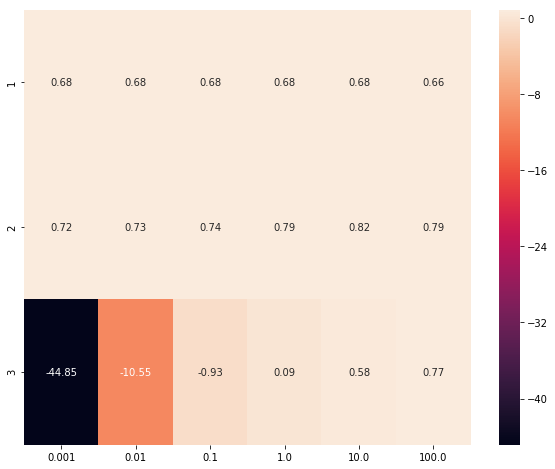

In [112]:
# 히트맵으로 처리 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(10,8))
#annot : 수치 값을 보여라.
sns.heatmap(df,annot=True, fmt='.2f')

plt.show()

In [114]:
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge

boston = load_boston()
data_train, data_test, label_train, label_test =train_test_split(boston.data, boston.target, random_state = 1)
from sklearn.preprocessing import PolynomialFeatures
pipe = make_pipeline(StandardScaler(), Ridge())
params = {        
    'ridge__alpha':[0.001,0.01, 0.1, 1, 10, 100]
}
grid = GridSearchCV(pipe,param_grid=params, cv=5 , n_jobs= -1, iid=True)
grid.fit(data_train,label_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [115]:
grid.score(data_test, label_test)

0.7776027124477704

In [ ]:
# 회귀 C, 분류 alpha => 최우선으로 건드려야할 params

In [116]:
from sklearn.ensemble import RandomForestClassifier

In [119]:
pipe = Pipeline([('preprocessing',StandardScaler()),
                 ('classifier',SVC())
                ])


In [132]:
param =[
    {
        'classifier':[SVC()],
        'classifier__C':[0.001, 0.01, 1 ,10 ,100],
        'classifier__gamma':[0.001, 0.01, 1 ,10 ,100],
        'preprocessing':[StandardScaler()]
    },
    {
        'classifier':[RandomForestClassifier(n_estimators=100)],
        'classifier__max_features':[1,2,3],
        #전처리기 사용 안함.
        'preprocessing':[None]
    }   
]

In [133]:
data_train, data_test, label_train, label_test = train_test_split(breast_cancer_data['data'],breast_cancer_data['target'],
                                                                 random_state = 2)

In [134]:
grid = GridSearchCV(pipe,param_grid=param, cv=5 , n_jobs= -1)
grid.fit(data_train,label_train)

NameError: name 'X_test' is not defined

In [135]:
print(grid.score(data_test,label_test))
print(grid.best_params_)
print(grid.best_score_)

0.986013986013986
{'classifier': SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), 'classifier__C': 10, 'classifier__gamma': 0.01, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}
0.9765258215962441
